In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter

In [4]:
df_rating_chester=pd.read_excel("07020500_rating_curve.xlsx", sheet_name="Rating curve Chester",header=1)
df_rating_chester_measured=pd.read_excel("07020500_rating_curve.xlsx", sheet_name="07020500")
df_rating_thebes=pd.read_excel("07022000_rating_curve.xlsx", sheet_name="Rating curve Thebes",header=1)
df_rating_thebes_measured=pd.read_excel("07022000_rating_curve.xlsx", sheet_name="07022000")
df_rating_chester.head, df_rating_thebes.head()

(<bound method NDFrame.head of       INDEP  SHIFT         DEP STOR    Stage(m)  Stage (ft)  Discharge (m3/s)  \
 0     -5.70      0    38000.00    *  102.117144      335.03       1076.040170   
 1     -5.69      0    38045.23  NaN  102.120192      335.04       1077.320941   
 2     -5.68      0    38090.48  NaN  102.123240      335.05       1078.602279   
 3     -5.67      0    38135.78  NaN  102.126288      335.06       1079.885032   
 4     -5.66      0    38181.10  NaN  102.129336      335.07       1081.168351   
 ...     ...    ...         ...  ...         ...         ...               ...   
 5666  50.96      0  1158239.61  NaN  119.387112      391.69      32797.693353   
 5667  50.97      0  1158679.54  NaN  119.390160      391.70      32810.150783   
 5668  50.98      0  1159119.58  NaN  119.393208      391.71      32822.611329   
 5669  50.99      0  1159559.74  NaN  119.396256      391.72      32835.075272   
 5670  51.00      0  1160000.00    *  119.399304      391.73      32

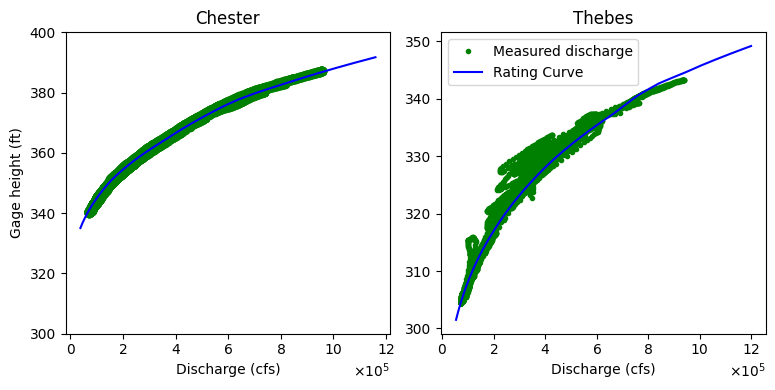

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(df_rating_chester_measured['discharge_cfs'], 
           df_rating_chester_measured['stage_ft_abs'], 
           label='Measured Chester', 
           color='green', 
           marker='o', 
           linestyle='None')
ax[0].plot(df_rating_chester['Discharge (cfs)'], 
           df_rating_chester['Stage (ft)'], 
           label='Rating Curve Chester', 
           color='blue')
ax[0].set_xlabel('Discharge (cfs)')
ax[0].set_ylabel('Gage height (ft)')
ax[0].set_title('Chester')
ax[0].set_ylim(300, 400)
ax[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(5,5))
#ax[0].legend()

# Thebes
ax[1].plot(df_rating_thebes_measured['discharge_cfs'], 
           df_rating_thebes_measured['stage_ft_abs'], 
           label='Measured discharge', 
           color='green', 
           marker='.', 
           linestyle='None')
ax[1].plot(df_rating_thebes['Discharge (cfs)'], 
           df_rating_thebes['Stage(ft)'], 
           label='Rating Curve', 
           color='blue')
ax[1].set_xlabel('Discharge (cfs)')
ax[1].set_title('Thebes')
ax[1].legend()
#ax[1].set_ylim(300, 400)
ax[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(5,5))

plt.tight_layout()
plt.show()

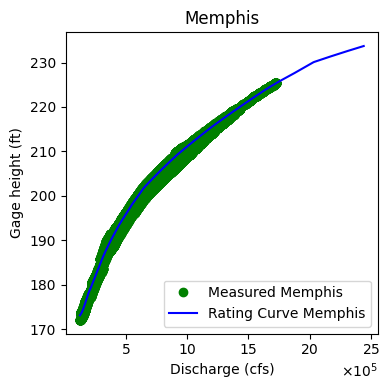

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def plot_rating_curve(station_name, station_number, file_path1, file_path2):
    """
    station_name: e.g. "Chester"
    station_number: e.g. "07020500"
    file_path: path to Excel/CSV containing both rating curve and measured data
    """

    # Read files depending on format
    if file_path1.endswith(".csv"):
        # Expected sheet names:
        # Rating curve sheet: "Rating curve {station_name}"
        # Measured sheet: station_number
        df_rating = pd.read_csv(file_path2)
        df_measured = pd.read_csv(file_path1)
    else:
        raise ValueError("Please provide an Excel file. CSV isn't supported with your sheet-based format.")

    # Create figure
    fig, ax = plt.subplots(figsize=(4, 4))

    # Plot measured data
    ax.plot(
        df_measured['discharge_cfs'],
        df_measured['stage_ft_abs'],
        label=f"Measured {station_name}",
        color="green",
        marker="o",
        linestyle="None"
    )

    # Plot rating curve
    ax.plot(
        df_rating['discharge_cfs'],
        df_rating['stage_ft'],
        label=f"Rating Curve {station_name}",
        color="blue"
    )

    # Formatting
    ax.set_xlabel("Discharge (cfs)")
    ax.set_ylabel("Gage height (ft)")
    ax.set_title(station_name)
    #ax.set_ylim(300, 400)
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci", axis="x", scilimits=(5, 5))
    ax.legend()

    plt.tight_layout()
    plt.show()


# Example usage:
#plot_rating_curve("Vicksburg", "07289000", "/media/12TB/Sujan/NWM/USGS_data/07289000.csv","/media/12TB/Sujan/NWM/USGS_data/###_rating_curve.csv")
plot_rating_curve("Memphis","07032000","/media/12TB/Sujan/NWM/USGS_data/07032000.csv","/media/12TB/Sujan/NWM/USGS_data/07032000_rating_curve.csv")
